***Importing all the required libraries***

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
from google.colab.patches import cv2_imshow

***Reading the car image and resizing it and converting it to grayscale***


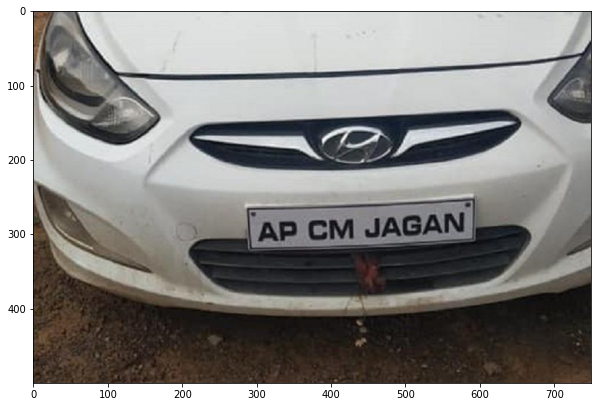

In [21]:
car_image = cv2.imread('/content/drive/MyDrive/DIVP_images/car3.jpg')
img = cv2.resize(car_image,(600,400))
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(car_image, cv2.COLOR_BGR2RGB))

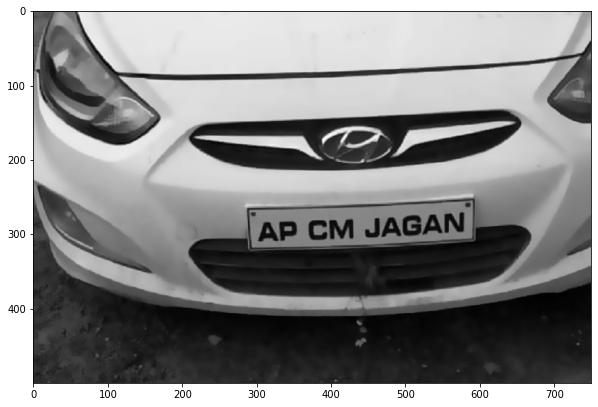

In [22]:
car_gray_image = cv2.cvtColor(car_image, cv2.COLOR_BGR2GRAY) 
filter_output= cv2.bilateralFilter(car_gray_image, 13, 15, 15) 
plt.figure(figsize=(10,10))
plt.imshow(filter_output,'gray')

***Using canny edge detection for finding edges***

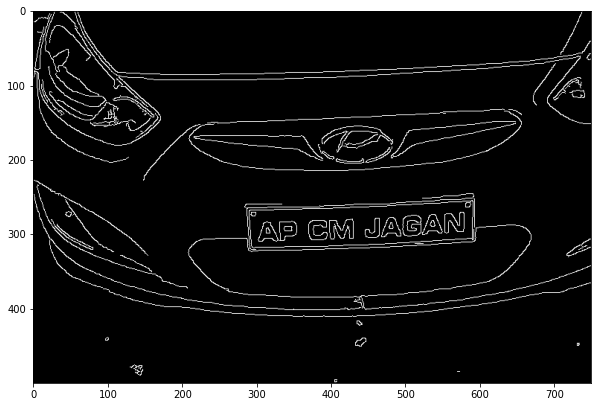

In [23]:
canny_edged_output= cv2.Canny(filter_output, 30, 200)                                       
plt.figure(figsize=(10,10))
plt.imshow(canny_edged_output,'gray')

***Finding the area of Number plate using cotour***

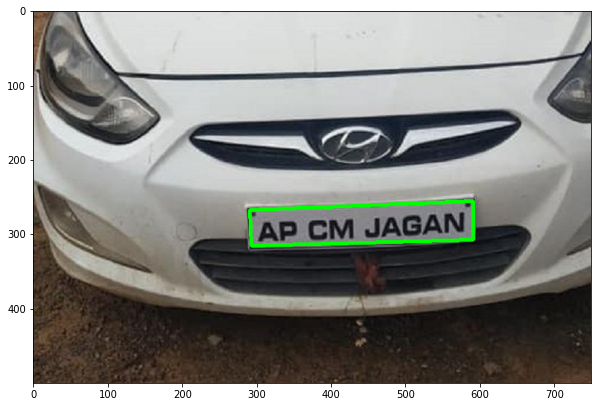

In [24]:
contours = cv2.findContours(canny_edged_output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)
screenCnt = None


for c in contours:
    
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018* peri, True)[:30]
 
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(car_image, [screenCnt], -1, (0, 255, 0), 3)
    
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(car_image, cv2.COLOR_BGR2RGB))

***Masking the remaining part other than number plate in image***

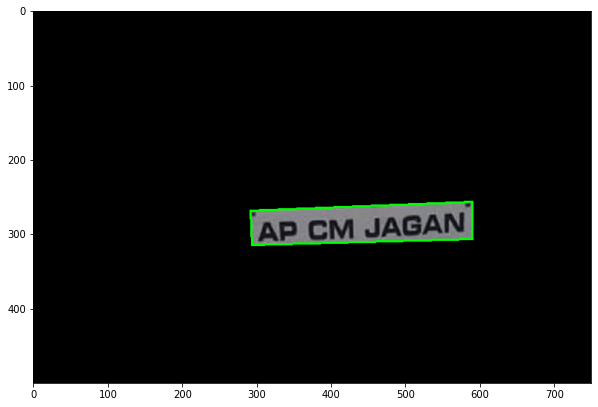

In [25]:
mask = np.zeros(car_gray_image.shape,np.uint8)
number_plate_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
number_plate_image = cv2.bitwise_and(car_image,car_image,mask=mask)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(number_plate_image, cv2.COLOR_BGR2RGB))

***Croping the number plate ***

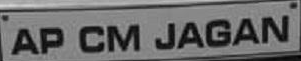

In [26]:
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped_number_plate_image = car_gray_image[topx:bottomx+1, topy:bottomy+1]
cv2_imshow(Cropped_number_plate_image)

***Using Pytesseract for converting caracter in image into text***

In [8]:
!sudo apt install tesseract-ocr
! pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,739 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [27]:
import pytesseract
#Read the number plate
text = pytesseract.image_to_string(Cropped_number_plate_image)
print("Detected Number is:",text)

Detected Number is: “AP CM JAGAN,

